# Load Data

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("data/v1/train.csv")

# Explore Individual Features

# Histograms

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import numpy as np

In [6]:
train.head().T

,0,1,2,3,4
Unnamed: 0,49800,29784,35476,8330,57384
date,01.01.2013,01.01.2013,01.01.2013,01.01.2013,01.01.2013
date_block_num,0,0,0,0,0
shop_id,18,27,7,19,14
item_id,5823,5573,1006,17707,19548
item_price,2500,849,399,899,149
item_cnt_day,1,1,1,1,1
datetime,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01
year,2013,2013,2013,2013,2013
month,1,1,1,1,1


In [7]:
train.dtypes

Unnamed: 0          int64
date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
datetime           object
year                int64
month               int64
day                 int64
dtype: object

## item_price

(array([  2.93563200e+06,   2.16000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ -1.00000000e+00,   3.07971000e+04,   6.15952000e+04,
          9.23933000e+04,   1.23191400e+05,   1.53989500e+05,
          1.84787600e+05,   2.15585700e+05,   2.46383800e+05,
          2.77181900e+05,   3.07980000e+05]),
 <a list of 10 Patch objects>)

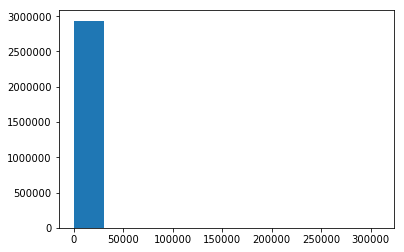

In [8]:
plt.hist(train.item_price)

(array([       0.,   659596.,  1417161.,   382253.,   210048.,   119074.,
           68688.,    26220.,    10520.,     8479.]),
 array([-1000.,  -400.,   200.,   800.,  1400.,  2000.,  2600.,  3200.,
         3800.,  4400.,  5000.]),
 <a list of 10 Patch objects>)

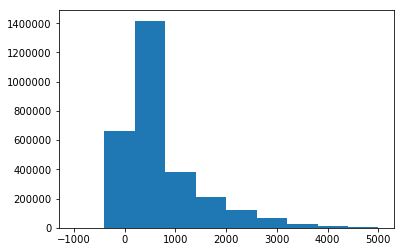

In [9]:
plt.hist(train.item_price, range=(-1000, 5000))

In [10]:
# be careful! there must be negative values
train[train.item_price < 0].item_price

482092   -1.0
Name: item_price, dtype: float64

(array([  2.93700000e+03,   1.72200000e+03,   3.13630000e+04,
          1.44140000e+04,   1.34181000e+05,   1.69456700e+06,
          9.66917000e+05,   7.79640000e+04,   1.17830000e+04,
          1.00000000e+00]),
 array([ -2.65926004,  -1.12955502,   0.40015   ,   1.92985501,
          3.45956003,   4.98926504,   6.51897006,   8.04867508,
          9.57838009,  11.10808511,  12.63779012]),
 <a list of 10 Patch objects>)

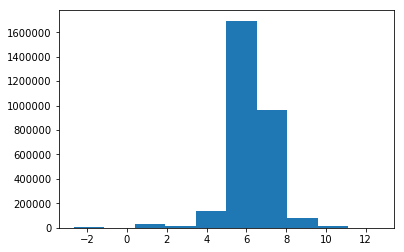

In [11]:
plt.hist(np.log(np.abs(train.item_price)))

In [12]:
# also there are values less than 1
train[train.item_price < 1].item_price.unique()

array([-1.        ,  0.1       ,  0.0875    ,  0.07      ,  0.09      ,
        0.2       ,  0.5       ,  0.99      ,  0.90871369])

In [13]:
len(train[train.item_price < 1])

4658

## item_cnt_day

In [14]:
cnt_pos = train[train.item_cnt_day > 0].item_cnt_day.tolist()

In [15]:
max(cnt_pos)

2169.0

In [16]:
cnt_neg = np.abs(train[train.item_cnt_day < 0].item_cnt_day.tolist())

In [17]:
max(cnt_neg)

22.0

(array([  2.62937200e+06,   1.94201000e+05,   6.70350000e+04,
          1.04740000e+04,   1.03950000e+04,   2.90300000e+03,
          3.99700000e+03,   1.26300000e+03,   2.00100000e+03,
          1.35400000e+03]),
 array([ -0.5 ,   1.05,   2.6 ,   4.15,   5.7 ,   7.25,   8.8 ,  10.35,
         11.9 ,  13.45,  15.  ]),
 <a list of 10 Patch objects>)

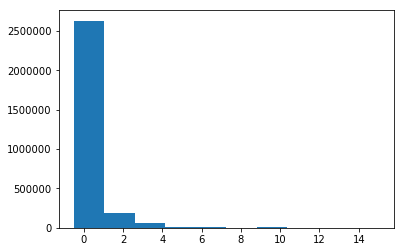

In [18]:
plt.hist(cnt_pos, range=(-0.5, 15))

(array([  7.34400000e+03,   7.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1. ,   3.1,   5.2,   7.3,   9.4,  11.5,  13.6,  15.7,  17.8,
         19.9,  22. ]),
 <a list of 10 Patch objects>)

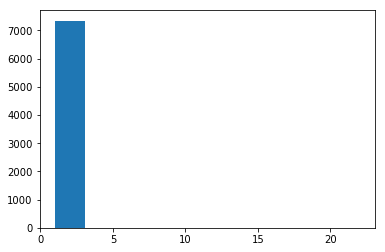

In [19]:
plt.hist(cnt_neg)

(array([  0.00000000e+00,   0.00000000e+00,   7.25200000e+03,
          0.00000000e+00,   7.80000000e+01,   0.00000000e+00,
          1.40000000e+01,   0.00000000e+00,   3.00000000e+00,
          4.00000000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

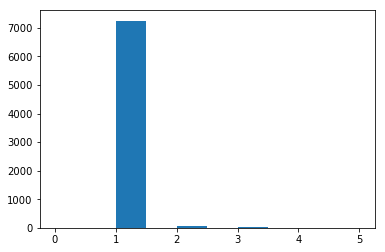

In [20]:
plt.hist(cnt_neg, range=(0, 5))

## Index versus value

In [21]:
plt

<module 'matplotlib.pyplot' from '/home/pc/anaconda2/envs/tf-cuda-py3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

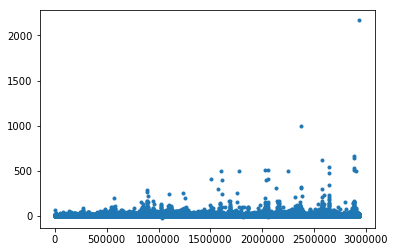

In [22]:
plt.plot(train.item_cnt_day, ".")

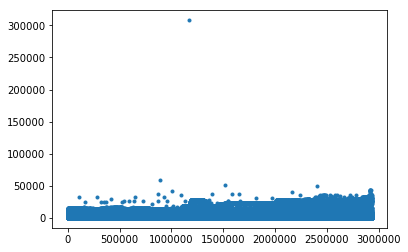

In [23]:
plt.plot(train.item_price, ".")

In [24]:
# outlier?
train[train.item_price > 250000]

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,year,month,day
1165576,1163158,13.12.2013,11,12,6066,307980.0,1.0,2013-12-13,2013,12,13


In [25]:
train[train.item_id == 6066].item_price

1165576    307980.0
Name: item_price, dtype: float64

In [26]:
# drop outlier row
train = train[train.item_price < 250000]

In [27]:
# color code accourding to the labels

In [28]:
X = train[["item_price"]].copy()

In [29]:
y = train.shop_id.tolist()

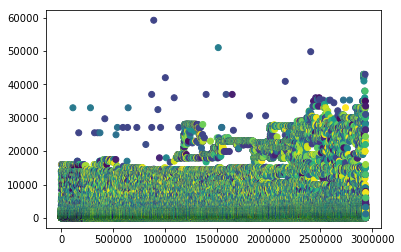

In [30]:
plt.scatter(range(len(X)), X, c=y)

## Feature statistics

In [31]:
train.describe()

,Unnamed: 0,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
count,2.935848e+06,2.935848e+06,2.935848e+06,2.935848e+06,2.935848e+06,2.935848e+06,2.935848e+06,2.935848e+06,2.935848e+06
mean,1.467924e+06,1.456991e+01,3.300174e+01,1.019723e+04,8.907486e+02,1.242641e+00,2.013777e+03,6.247715e+00,1.585267e+01
std,8.475069e+05,9.422989e+00,1.622697e+01,6.324298e+03,1.720490e+03,2.618835e+00,7.684790e-01,3.536218e+00,8.923484e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,2.013000e+03,1.000000e+00,1.000000e+00
25%,7.339618e+05,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00
50%,1.467924e+06,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01
75%,2.201886e+06,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,2.014000e+03,9.000000e+00,2.400000e+01
max,2.935848e+06,3.300000e+01,5.900000e+01,2.216900e+04,5.920000e+04,2.169000e+03,2.015000e+03,1.200000e+01,3.100000e+01


## Value Counts

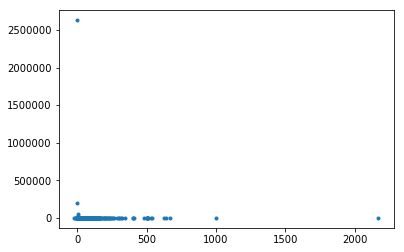

In [32]:
plt.plot(train.item_cnt_day.value_counts(), ".")

In [33]:
train.item_cnt_day.value_counts()

 1.0      2629371
 2.0       194201
 3.0        47350
 4.0        19685
 5.0        10474
-1.0         7252
 6.0         6338
 7.0         4057
 8.0         2903
 9.0         2177
 10.0        1820
 11.0        1263
 12.0        1083
 13.0         918
 14.0         716
 15.0         638
 16.0         544
 17.0         438
 18.0         391
 20.0         364
 19.0         347
 21.0         290
 22.0         242
 24.0         204
 23.0         198
 25.0         180
 26.0         176
 30.0         147
 28.0         131
 27.0         130
           ...   
 95.0           1
 96.0           1
 102.0          1
 105.0          1
 109.0          1
 112.0          1
 113.0          1
 118.0          1
 128.0          1
 129.0          1
 131.0          1
 132.0          1
 135.0          1
 146.0          1
 200.0          1
 147.0          1
 149.0          1
 153.0          1
 154.0          1
 156.0          1
 157.0          1
 504.0          1
 163.0          1
 164.0          1
 167.0    

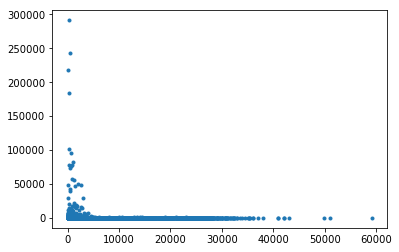

In [34]:
plt.plot(train.item_price.value_counts(), ".")

In [35]:
train.item_price.value_counts()

299.000000      291352
399.000000      242603
149.000000      218432
199.000000      184044
349.000000      101461
599.000000       95673
999.000000       82784
799.000000       77882
249.000000       77685
699.000000       76493
499.000000       73078
899.000000       57156
1199.000000      55448
1999.000000      49672
99.000000        48955
2599.000000      47857
1499.000000      47196
449.000000       43205
549.000000       39080
5.000000         29702
2999.000000      28929
1299.000000      22381
169.000000       20848
1699.000000      18924
1099.000000      17645
749.000000       17351
1799.000000      17292
2499.000000      16713
1399.000000      15694
1599.000000      14293
                 ...  
4245.875000          1
174.100000           1
848.060000           1
691.605263           1
4239.000000          1
449.166667           1
1671.600000          1
428.553333           1
205.920000           1
4319.000000          1
1683.650000          1
2673.137931          1
455.666667 

## isnull

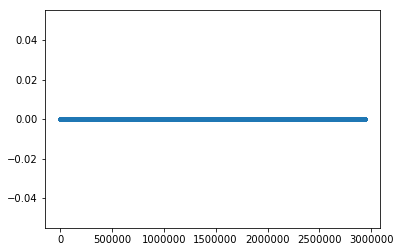

In [36]:
plt.plot(train.item_cnt_day.isnull(), ".")

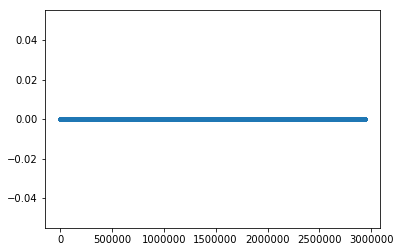

In [37]:
plt.plot(train.item_price.isnull(), ".")

# Explore Feature Relations

In [38]:
train.head()

,Unnamed: 0,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,year,month,day
0,49800,01.01.2013,0,18,5823,2500.0,1.0,2013-01-01,2013,1,1
1,29784,01.01.2013,0,27,5573,849.0,1.0,2013-01-01,2013,1,1
2,35476,01.01.2013,0,7,1006,399.0,1.0,2013-01-01,2013,1,1
3,8330,01.01.2013,0,19,17707,899.0,1.0,2013-01-01,2013,1,1
4,57384,01.01.2013,0,14,19548,149.0,1.0,2013-01-01,2013,1,1


## Scatter plots

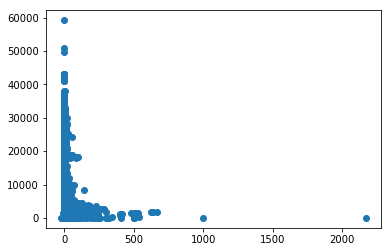

In [39]:
plt.scatter(train.item_cnt_day, train.item_price)

In [40]:
# all features
#pd.plotting.scatter_matrix(train) # no need here

## Correlation matrices

In [41]:
train.corr()

,Unnamed: 0,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day
Unnamed: 0,1.000000,0.996305,0.023267,0.008443,0.096382,0.009502,0.925056,0.242503,0.020078
date_block_num,0.996305,1.000000,0.019273,0.009356,0.095547,0.009402,0.928280,0.243939,0.018890
shop_id,0.023267,0.019273,1.000000,0.029396,-0.024085,-0.005230,0.011804,0.020575,0.001767
item_id,0.008443,0.009356,0.029396,1.000000,-0.134790,0.016650,0.010339,-0.002033,-0.002784
item_price,0.096382,0.095547,-0.024085,-0.134790,1.000000,0.011263,0.080688,0.044188,0.014829
item_cnt_day,0.009502,0.009402,-0.005230,0.016650,0.011263,1.000000,0.002699,0.018014,0.005218
year,0.925056,0.928280,0.011804,0.010339,0.080688,0.002699,1.000000,-0.134203,-0.015505
month,0.242503,0.243939,0.020575,-0.002033,0.044188,0.018014,-0.134203,1.000000,0.090770
day,0.020078,0.018890,0.001767,-0.002784,0.014829,0.005218,-0.015505,0.090770,1.000000


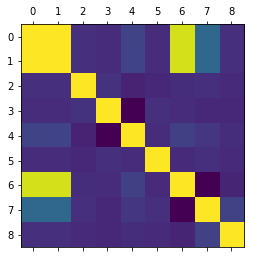

In [42]:
plt.matshow(train.corr())

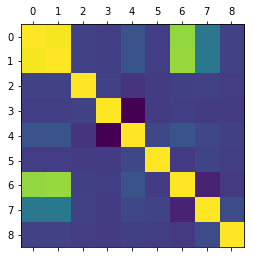

In [43]:
plt.matshow(train.corr("kendall"))

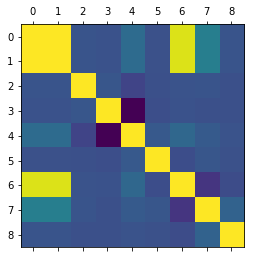

In [44]:
plt.matshow(train.corr("spearman"))

In [45]:
# save train set v2 (without that outlier row)
%mkdir -p data/v2
train.to_csv("data/v2/train.csv")